## Multilayer-perceptron approach for MNIST classification

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Using TensorFlow backend.
/Users/florent/anaconda/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


First, we download the data. Mnist is so classic that it is already implemented in Keras

60000 train samples
10000 test samples
These are numbers corresponding to  5   0   4  and  1


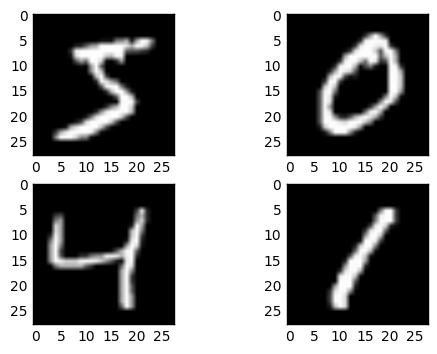

In [2]:
# Download the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# and let us look at the numbers
print("These are numbers corresponding to ",y_train[0]," ",y_train[1]," ",y_train[2]," and ",y_train[3])
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))

Now we need to tranform these two dimensional images into a single dimensional vector, which we should also normalize. We also wants to tranform the "y"s into one-hot-encoding type vectors.

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') #convert in float...
x_test = x_test.astype('float32')
x_train /= 255  # .. and normalize
x_test /= 255

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("The cateragories of these image is now encoded as : \n",y_train[0][:],"\n",y_train[1][:],"\n",y_train[2][:],"\n",y_train[3][:],"\n" )

The cateragories of these image is now encoded as : 
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.] 
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.] 
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] 



It is now time to build our multi-layer neural net. First we shall do it with a single hidden layer

In [14]:
batch_size = 128
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


and to perform our fit

In [15]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s - loss: 0.2700 - acc: 0.9217 - val_loss: 0.1471 - val_acc: 0.9561
Epoch 2/20
60000/60000 [==============================] - 3s - loss: 0.1154 - acc: 0.9652 - val_loss: 0.0940 - val_acc: 0.9719
Epoch 3/20
60000/60000 [==============================] - 3s - loss: 0.0815 - acc: 0.9752 - val_loss: 0.0794 - val_acc: 0.9753
Epoch 4/20
60000/60000 [==============================] - 3s - loss: 0.0647 - acc: 0.9800 - val_loss: 0.0736 - val_acc: 0.9782
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.0523 - acc: 0.9841 - val_loss: 0.0665 - val_acc: 0.9797
Epoch 6/20
60000/60000 [==============================] - 3s - loss: 0.0428 - acc: 0.9868 - val_loss: 0.0679 - val_acc: 0.9813
Epoch 7/20
60000/60000 [==============================] - 3s - loss: 0.0373 - acc: 0.9890 - val_loss: 0.0658 - val_acc: 0.9826
Epoch 8/20
60000/60000 [==============================] - 3s 

This is pretty good, such accuracy was the state of the art for a long time (check it here: http://yann.lecun.com/exdb/mnist/) You can now see how things change if we remove dropout, take a more shallow network, or add a second layer. It seems to be difficult to improve too much on this performance with this approach.